In [ ]:
! pip install --upgrade \
  diffusers~=0.16 \
  transformers~=4.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipeline = pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
!pip install -q transformers accelerate peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

pytorch_model.bin:  59%|#####9    | 357M/603M [00:00<?, ?B/s]

In [ ]:
import torch
import torchvision.transforms as T
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes").to(device)

def pipe(image):

    inputs = processor(images=image, return_tensors="pt").to(device)
    outputs = model(**inputs)
    logits = outputs.logits.cpu()
    upsampled_logits = F.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )
    pred_seg = upsampled_logits.argmax(dim=1)[0]
    return image, pred_seg

def remove_classes(image_path):
    original_image, pred_seg = pipe(image_path)

    # Convert to numpy arrays
    original_image_np = np.array(original_image)
    pred_seg_np = pred_seg.numpy()

    classes_to_remove = [4]

    combined_mask = np.isin(pred_seg_np, classes_to_remove)

    modified_image_np = np.zeros_like(original_image_np)

    modified_image_np[combined_mask] = [255]
    modified_image = Image.fromarray(modified_image_np.astype(np.uint8))
    plt.imshow(modified_image)
    plt.axis("off")
    plt.show()
    return modified_image

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

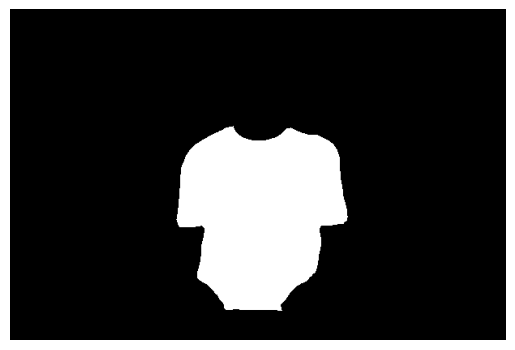

In [ ]:
image_path="/content/text.jpg"
image = Image.open(image_path).convert("RGB")
size=(512,512)
modified_image=remove_classes(image)

In [ ]:
import matplotlib.pyplot as plt

def display_images(original_image, modified_image, new_image):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(modified_image, cmap='gray')
    axs[1].set_title("Mask Image")
    axs[1].axis("off")

    axs[2].imshow(new_image)
    axs[2].set_title("New Image")
    axs[2].axis("off")

    plt.show()




  0%|          | 0/50 [00:00<?, ?it/s]

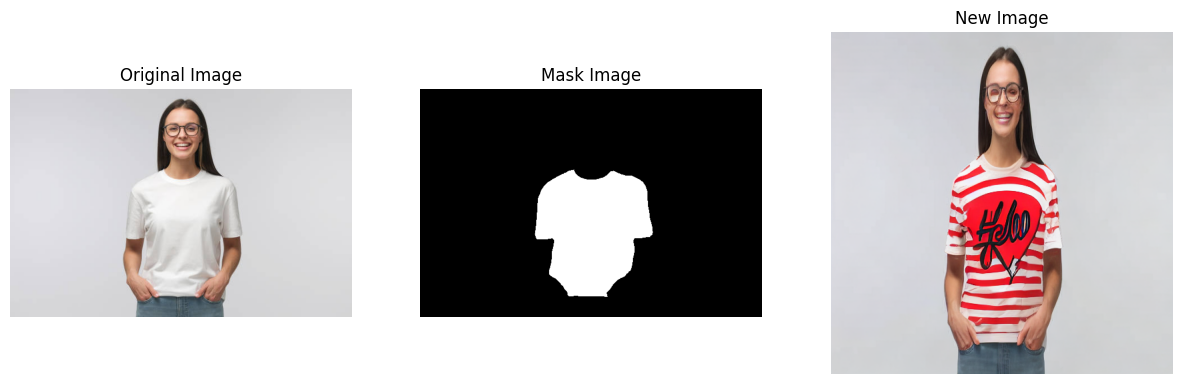

In [ ]:
prompt = "Red shirt with hello on it"
new_image = pipeline(prompt=prompt, image=image, mask_image=modified_image).images[0]
display_images(image, modified_image, new_image)

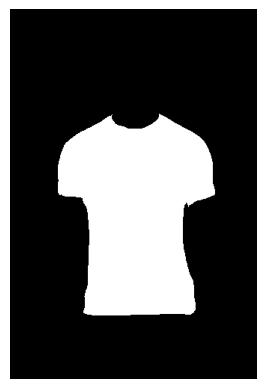

In [ ]:
image_path="/content/new.png"
image = Image.open(image_path).convert("RGB")
size=(512,512)
modified_image=remove_classes(image)

  0%|          | 0/50 [00:00<?, ?it/s]

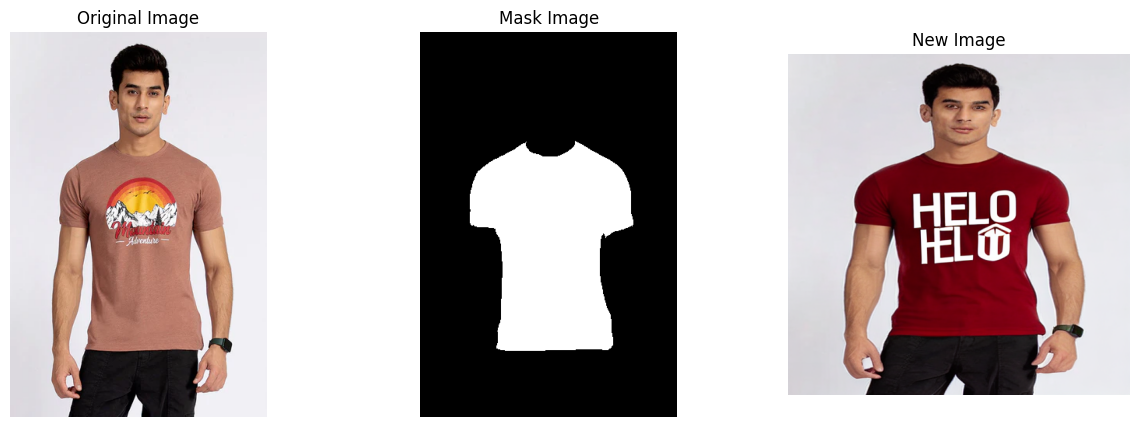

In [ ]:
prompt = "Red shirt with hello on it"
new_image = pipeline(prompt=prompt, image=image, mask_image=modified_image).images[0]
display_images(image, modified_image, new_image)

In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
%%writefile virtualtron.py
import streamlit as st
from PIL import Image
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from diffusers import StableDiffusionInpaintPipeline


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to(device)

# Move model to device only after initialization
model = model.to(device)

def pipe(image):
    inputs = processor(images=image, return_tensors="pt").to(device)
    outputs = model(**inputs)
    logits = outputs.logits.cpu()
    upsampled_logits = F.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )
    pred_seg = upsampled_logits.argmax(dim=1)[0]
    return image, pred_seg

def remove_classes(image):
    original_image, pred_seg = pipe(image)

    original_image_np = np.array(original_image)
    pred_seg_np = pred_seg.numpy()

    classes_to_remove = [4]

    combined_mask = np.isin(pred_seg_np, classes_to_remove)

    modified_image_np = original_image_np.copy()
    modified_image_np[combined_mask] = [255, 255, 255]
    modified_image = Image.fromarray(modified_image_np.astype(np.uint8))
    return modified_image

def display_images(image, modified_image, new_image):
    st.image(image, caption="Original Image", use_column_width=True)
    st.image(modified_image, caption="Masked Image", use_column_width=True)
    st.image(new_image, caption="New Shirt Applied", use_column_width=True)


st.title("Virtual Try-On: Shirt Replacement")

uploaded_image = st.file_uploader("Upload an image of yourself", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    image = Image.open(uploaded_image).convert("RGB")

    st.write("Processing image...")
    modified_image = remove_classes(image)

    prompt = st.text_input("Enter the description of the shirt you'd like to try on")

    if st.button("Generate New Look"):
        with st.spinner("Generating..."):
            new_image = pipe_inpaint(prompt=prompt, image=image, mask_image=modified_image).images[0]
            display_images(image, modified_image, new_image)


Overwriting virtualtron.py


In [ ]:
import os
from pyngrok import ngrok
ngrok.set_auth_token('2lBVkWdXnljKgZi75B3ltKJzbit_7yEDhXM3PcHuSPvX9szUm')

port = 8500

public_url = ngrok.connect(port)
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
os.system(f'streamlit run virtualtron.py --server.port {port}')

Streamlit app is live at: NgrokTunnel: "https://63a7-34-83-214-1.ngrok-free.app" -> "http://localhost:8500"
